In [1]:
# Import the read_gsi_berror module
import read_gsi_berror as rb

In [2]:
# Open the GSI Berror file
file = rb.openf("gsir4.berror_stats.gcv.BAM.TQ0062L028")

In [3]:
# Read the grid informationf2py -c -m read_gsi_berror read_gsi_berror.f90
grid = rb.read_grid_size(file)

In [4]:
# Inspect the grid dimensions (nlat, nlon, nsig, ierr)
# ierr = 0 means a correct read
grid

(98, 192, 28, 0)

In [5]:
# The grid object is a tuple with 4 elements
len(grid)

4

In [6]:
# Read the balance projection matrices
balprojs = rb.read_balprojs(file)

In [7]:
# Inspect the balance projection matrices (agvin, bgvin, wgvin, ierr)
# ierr = 0 means a correct read
#balprojs

In [8]:
# The balprojs is a tuple with 4 elements
len(balprojs)

4

In [9]:
# Read the amplitudes and horizontal/vertical length scales (var, corzin, hscalesin, vscalesin, corpin, hscalepin, corq2in, corsstin, hsstin, ierr)
# ierr = 0 means a correct read
amplitudes = rb.read_amplitudes(file)

In [10]:
# Inspect the amplitudes 
#amplitudes

In [11]:
# The amplitudes is a tuple with 10 elements
len(amplitudes)

10

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

#plt.rcParams.update({"font.size":10})

In [13]:
# Create data arrays for the balance projection matrices
lats = np.linspace(-90,90,grid[0])
levs = np.arange(1,grid[2]+1)

agvin = balprojs[0]
bgvin = balprojs[1]
wgvin = balprojs[2]

da_agvin = xr.DataArray(agvin, dims=["latitude","sigma","sigma_2"], coords={"latitude":lats,"sigma":levs,"sigma_2":levs})
da_bgvin = xr.DataArray(bgvin, dims=["latitude","sigma"], coords={"latitude":lats,"sigma":levs})
da_wgvin = xr.DataArray(wgvin, dims=["latitude","sigma"], coords={"latitude":lats,"sigma":levs})

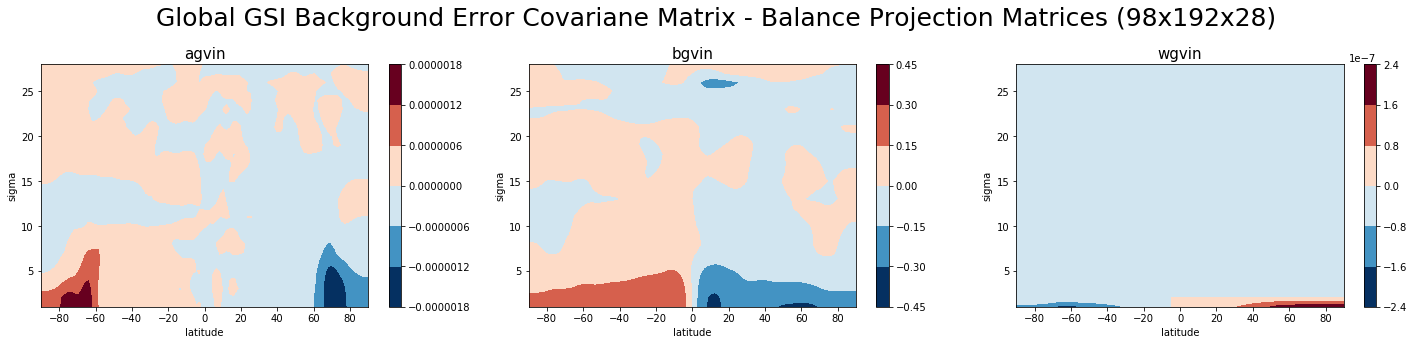

In [14]:
# Make minimal plots to check the balance projection matrices
fig, axes = plt.subplots(figsize=(20,5),ncols=3)

#da_agvin.isel(sigma_2=0).transpose("sigma","latitude").plot.contourf(cmap="RdBu_r",cbar_kwargs={"format":"%.2f"},ax=axes[0])
da_agvin.isel(sigma_2=0).transpose("sigma","latitude").plot.contourf(cmap="RdBu_r",ax=axes[0]) # Note: you can vary sigma_2 from 0 until 27
axes[0].set_title("agvin",size=15)

da_bgvin.transpose("sigma","latitude").plot.contourf(cmap="RdBu_r",ax=axes[1])
axes[1].set_title("bgvin",size=15)

da_wgvin.transpose("sigma","latitude").plot.contourf(cmap="RdBu_r",ax=axes[2])
axes[2].set_title("wgvin",size=15)

plt.suptitle("Global GSI Background Error Covariane Matrix - Balance Projection Matrices (98x192x28)",size=25)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])

In [15]:
# Create data arrays for the amplitudes and horizontal/vertical length scales

# Amplitudes
corr = amplitudes[1]
da_corr = xr.DataArray(corr, dims=["latitude","sigma","variable"], coords={"latitude":lats,"sigma":levs, "variable":["sf","vp","t","q","oz","cw","ps","sst"]})

# Horizontal Length Scales
hlen = amplitudes[2]
da_hlen = xr.DataArray(hlen, dims=["latitude","sigma","variable"], coords={"latitude":lats,"sigma":levs, "variable":["sf","vp","t","q","oz","cw","ps","sst"]})

# Vertical Length Scales
vlen = amplitudes[3]
da_vlen = xr.DataArray(vlen, dims=["latitude","sigma","variable"], coords={"latitude":lats,"sigma":levs, "variable":["sf","vp","t","q","oz","cw","ps","sst"]})

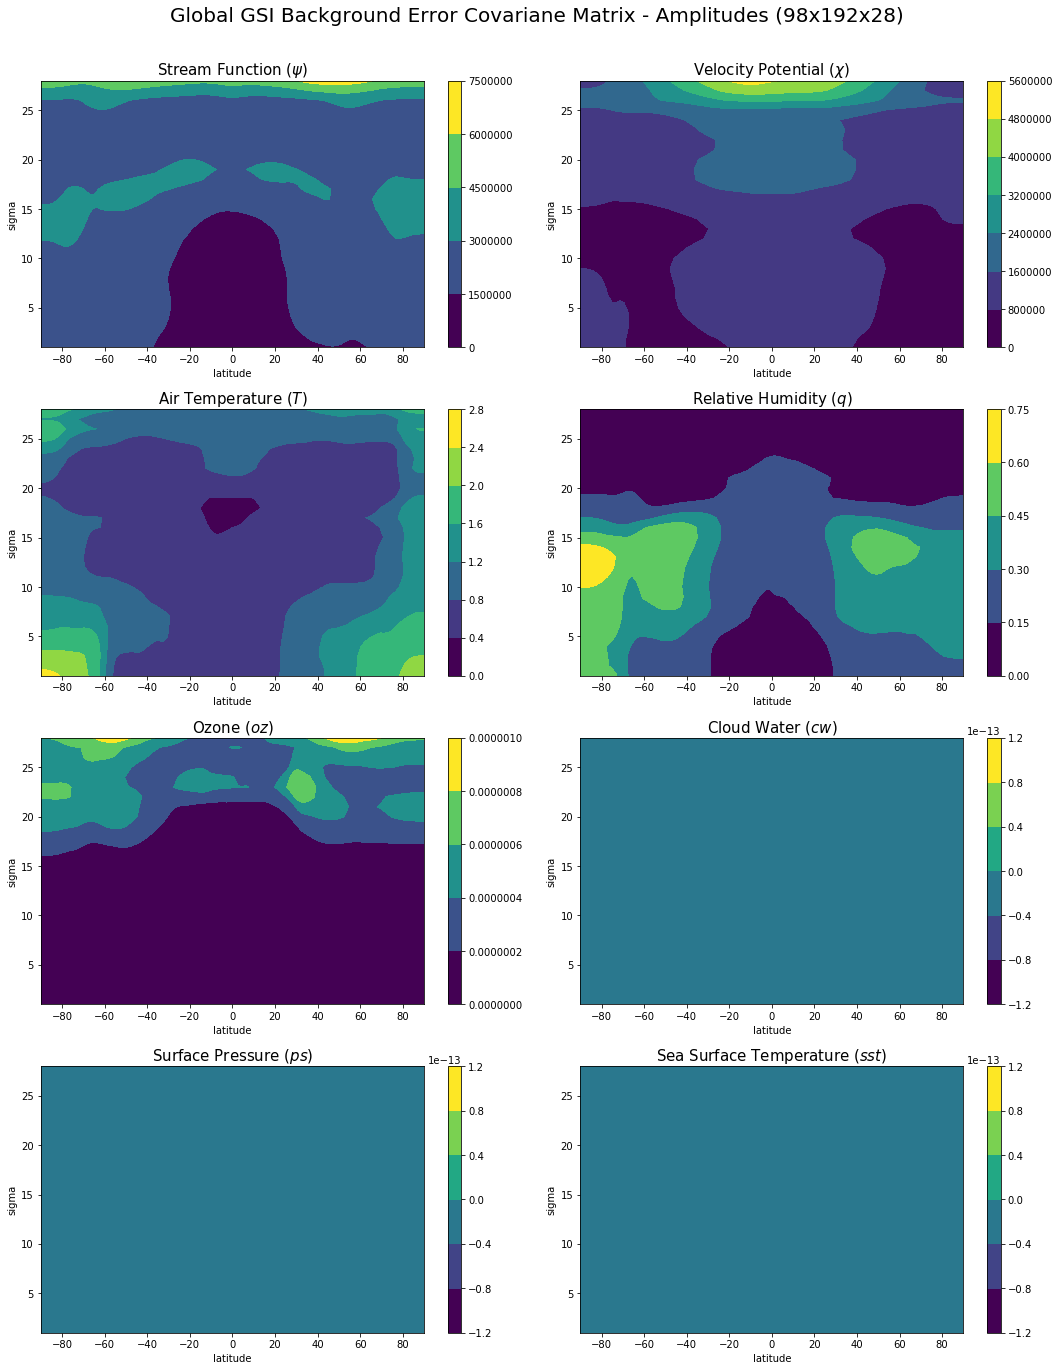

In [16]:
# Make minimal plots to check the amplitudes for sf, vp, t, q, oz, cw, ps, sst
fig, axes = plt.subplots(figsize=(15,20),ncols=2,nrows=4)

# Stream Function
da_corr.isel(variable=0).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,0])
axes[0,0].set_title("Stream Function ($\psi$)",size=15)

# Velocity Potential
da_corr.isel(variable=1).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,1])
axes[0,1].set_title("Velocity Potential ($\chi$)",size=15)

# Air Temperature
da_corr.isel(variable=2).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,0])
axes[1,0].set_title("Air Temperature ($T$)",size=15)

# Relative Humidity
da_corr.isel(variable=3).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,1])
axes[1,1].set_title("Relative Humidity ($q$)",size=15)

# Ozone
da_corr.isel(variable=4).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,0])
axes[2,0].set_title("Ozone ($oz$)",size=15)

# Cloud Water
da_corr.isel(variable=5).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,1])
axes[2,1].set_title("Cloud Water ($cw$)",size=15)

# Surface Pressure
da_corr.isel(variable=6).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,0])
axes[3,0].set_title("Surface Pressure ($ps$)",size=15)

# Sea Surface Temperature
da_corr.isel(variable=7).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,1])
axes[3,1].set_title("Sea Surface Temperature ($sst$)",size=15)

plt.suptitle("Global GSI Background Error Covariane Matrix - Amplitudes (98x192x28)",size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

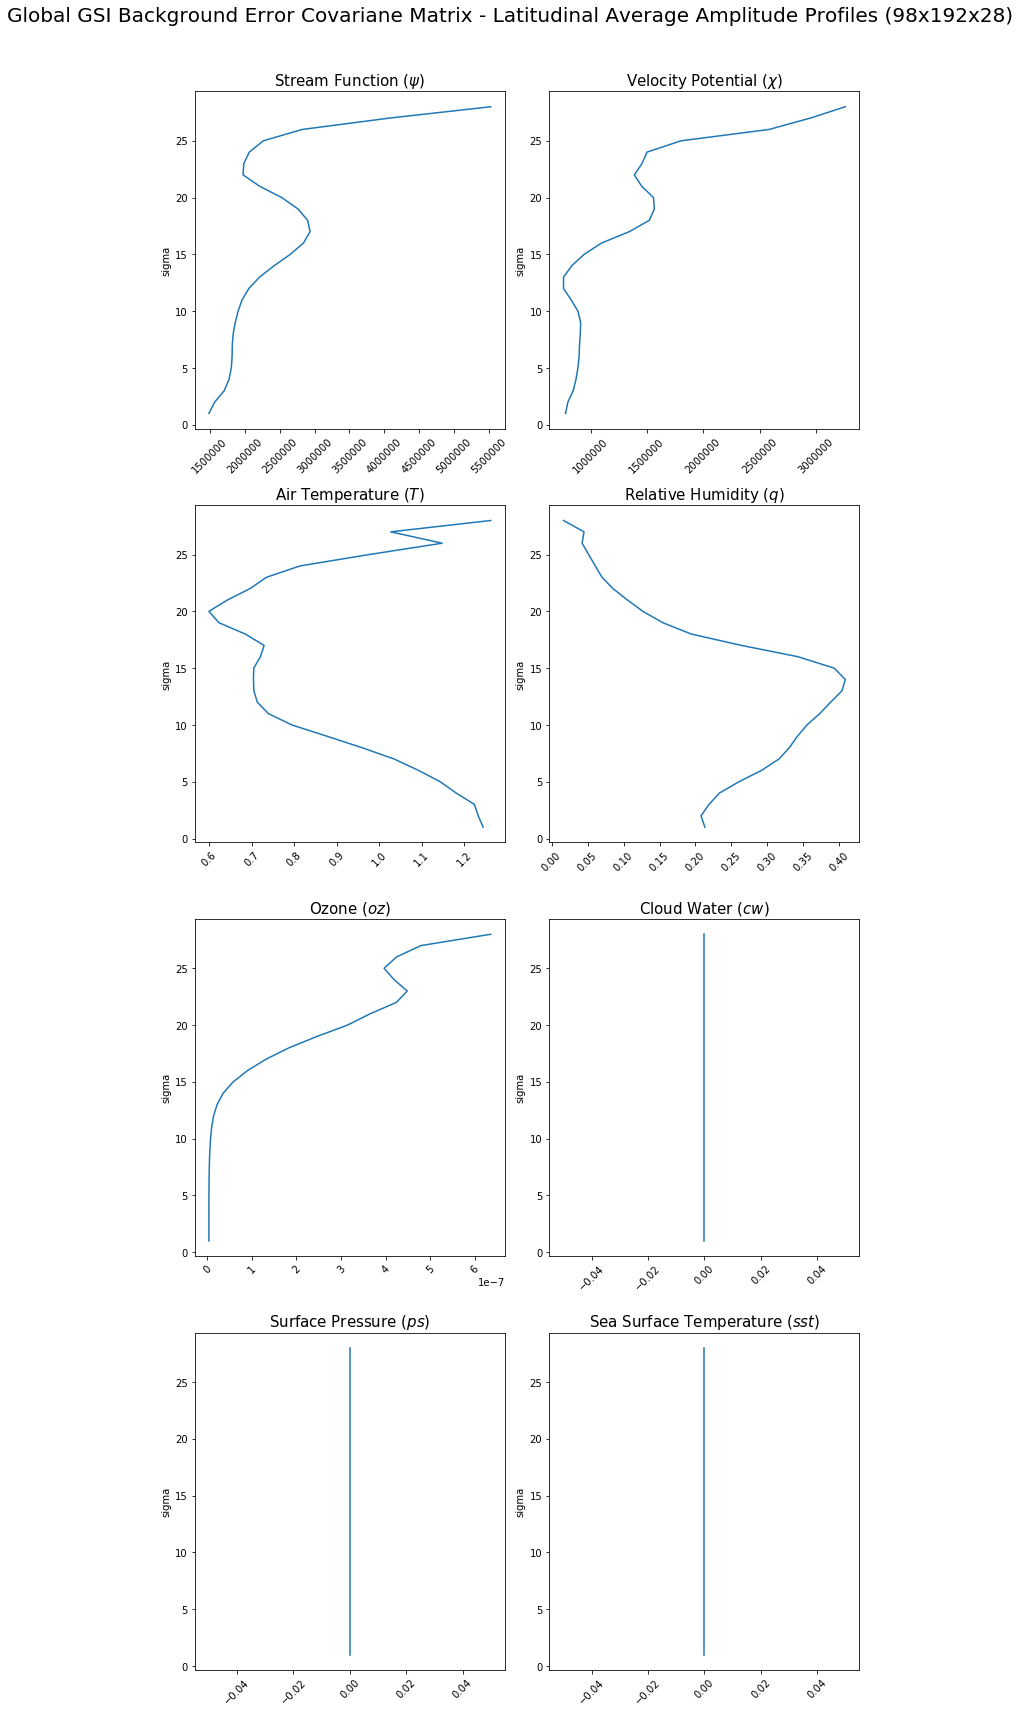

In [17]:
# Make minimal plots to check the latitudinal averages of the amplitudes for sf, vp, t, q, oz, cw, ps, sst
fig, axes = plt.subplots(figsize=(10,25),ncols=2,nrows=4)

# Stream Function
da_corr.isel(variable=0).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[0,0])
axes[0,0].set_title("Stream Function ($\psi$)",size=15)
#axes[0,0].set_yticklabels()
axes[0,0].tick_params(axis="x",rotation=45)
#axes[0,0].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Velocity Potential
da_corr.isel(variable=1).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[0,1])
axes[0,1].set_title("Velocity Potential ($\chi$)",size=15)
#axes[0,1].set_yticklabels()
axes[0,1].tick_params(axis="x",rotation=45)
#axes[0,1].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Air Temperature
da_corr.isel(variable=2).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[1,0])
axes[1,0].set_title("Air Temperature ($T$)",size=15)
#axes[1,0].set_yticklabels()
axes[1,0].tick_params(axis="x",rotation=45)
#axes[1,0].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Relative Humidity
da_corr.isel(variable=3).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[1,1])
axes[1,1].set_title("Relative Humidity ($q$)",size=15)
#axes[1,1].set_yticklabels()
axes[1,1].tick_params(axis="x",rotation=45)
#axes[1,1].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Ozone
da_corr.isel(variable=4).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[2,0])
axes[2,0].set_title("Ozone ($oz$)",size=15)
#axes[2,0].set_yticklabels()
axes[2,0].tick_params(axis="x",rotation=45)
#axes[2,0].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Cloud Water
da_corr.isel(variable=5).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[2,1])
axes[2,1].set_title("Cloud Water ($cw$)",size=15)
#axes[2,1].set_yticklabels()
axes[2,1].tick_params(axis="x",rotation=45)
#axes[2,1].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Surface Pressure
da_corr.isel(variable=6).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[3,0])
axes[3,0].set_title("Surface Pressure ($ps$)",size=15)
#axes[3,0].set_yticklabels()
axes[3,0].tick_params(axis="x",rotation=45)
#axes[3,0].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

# Sea Surface Temperature
da_corr.isel(variable=7).transpose("sigma","latitude").mean("latitude").plot(y="sigma",ax=axes[3,1])
axes[3,1].set_title("Sea Surface Temperature ($sst$)",size=15)
#axes[3,1].set_yticklabels()
axes[3,1].tick_params(axis="x",rotation=45)
#axes[3,1].xaxis.set_major_formatter(FormatStrFormatter('%.2e'))

plt.suptitle("Global GSI Background Error Covariane Matrix - Latitudinal Average Amplitude Profiles (98x192x28)",size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

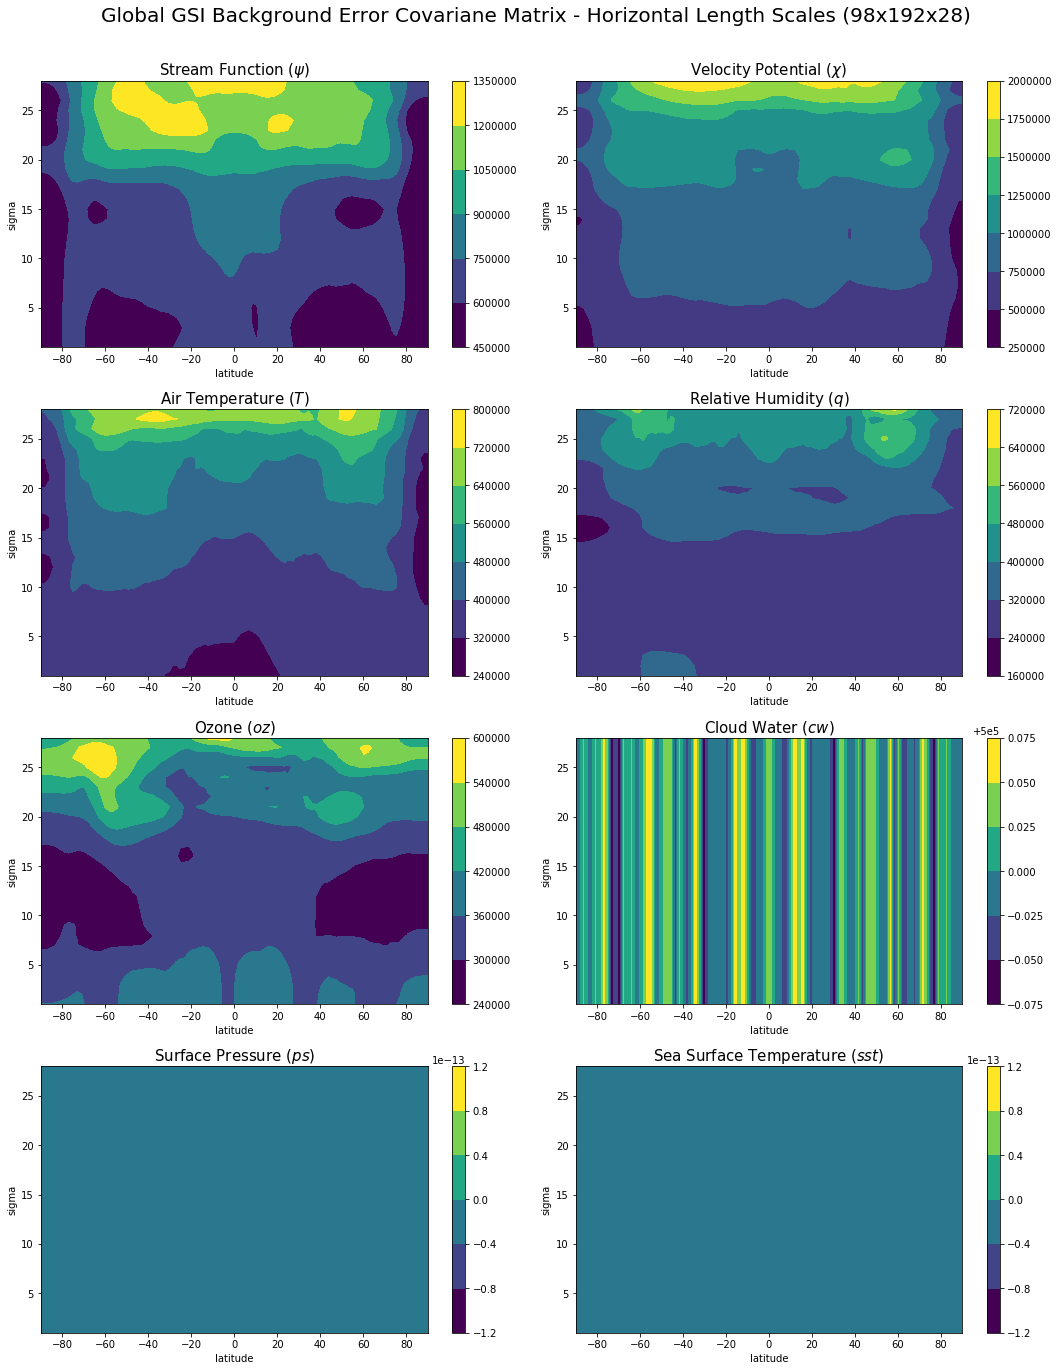

In [18]:
# Make minimal plots to check the horizontal length scales for sf, vp, t, q, oz, cw, ps, sst
fig, axes = plt.subplots(figsize=(15,20),ncols=2,nrows=4)

# Stream Function
da_hlen.isel(variable=0).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,0])
axes[0,0].set_title("Stream Function ($\psi$)",size=15)

# Velocity Potential
da_hlen.isel(variable=1).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,1])
axes[0,1].set_title("Velocity Potential ($\chi$)",size=15)

# Air Temperature
da_hlen.isel(variable=2).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,0])
axes[1,0].set_title("Air Temperature ($T$)",size=15)

# Relative Humidity
da_hlen.isel(variable=3).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,1])
axes[1,1].set_title("Relative Humidity ($q$)",size=15)

# Ozone
da_hlen.isel(variable=4).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,0])
axes[2,0].set_title("Ozone ($oz$)",size=15)

# Cloud Water
da_hlen.isel(variable=5).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,1])
axes[2,1].set_title("Cloud Water ($cw$)",size=15)

# Surface Pressure
da_hlen.isel(variable=6).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,0])
axes[3,0].set_title("Surface Pressure ($ps$)",size=15)

# Sea Surface Temperature
da_hlen.isel(variable=7).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,1])
axes[3,1].set_title("Sea Surface Temperature ($sst$)",size=15)

plt.suptitle("Global GSI Background Error Covariane Matrix - Horizontal Length Scales (98x192x28)",size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

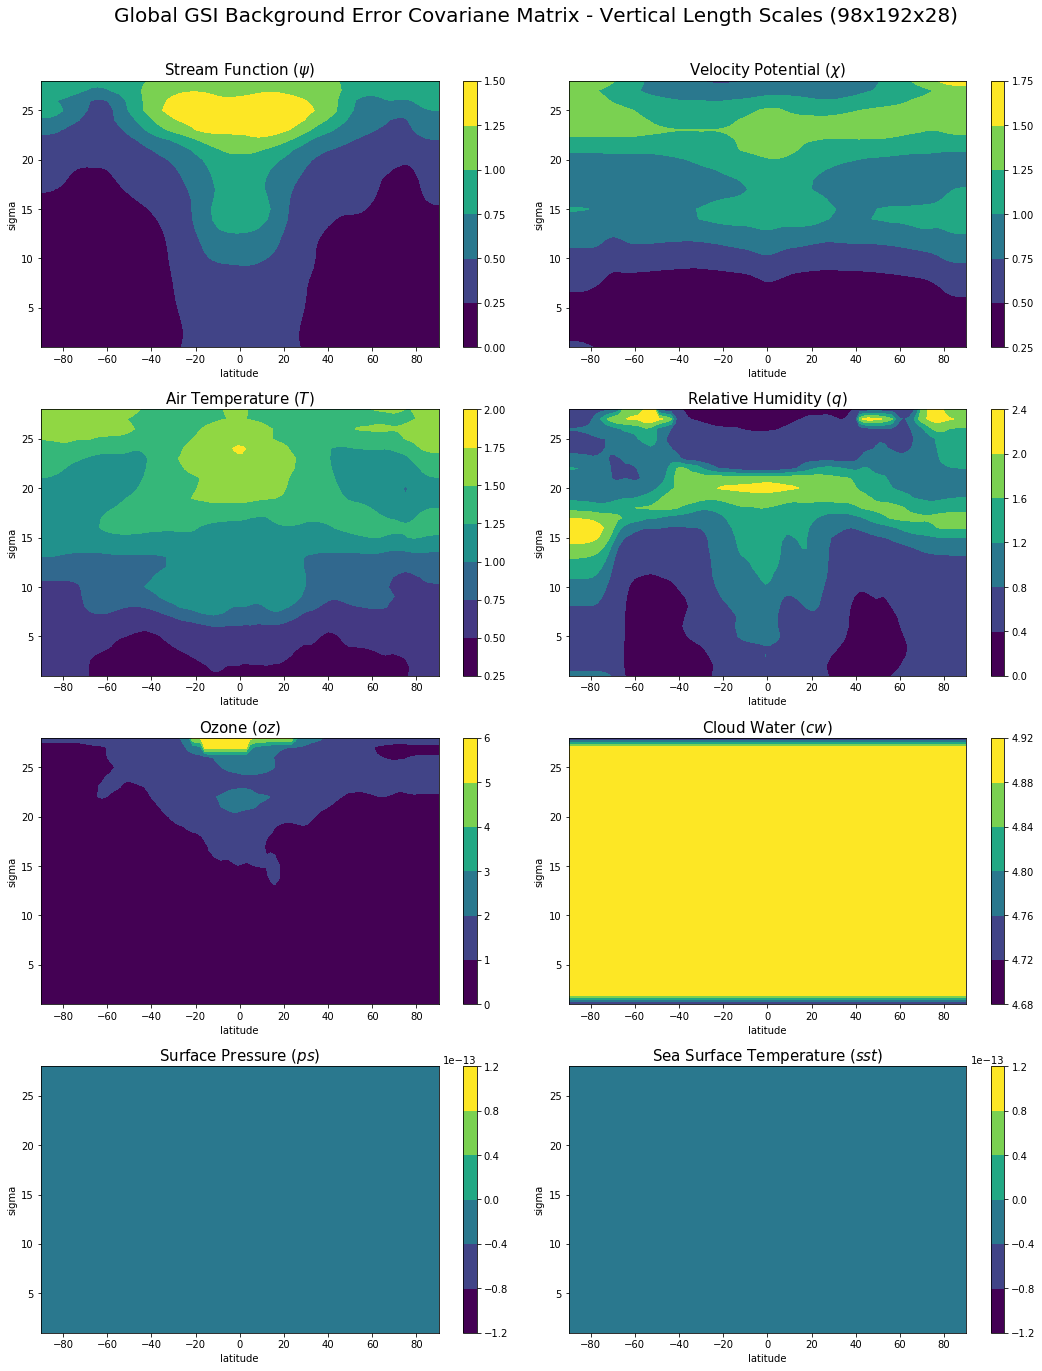

In [19]:
# Make minimal plots to check the vertical length scales for sf, vp, t, q, oz, cw, ps, sst
fig, axes = plt.subplots(figsize=(15,20),ncols=2,nrows=4)

# Stream Function
da_vlen.isel(variable=0).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,0])
axes[0,0].set_title("Stream Function ($\psi$)",size=15)

# Velocity Potential
da_vlen.isel(variable=1).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[0,1])
axes[0,1].set_title("Velocity Potential ($\chi$)",size=15)

# Air Temperature
da_vlen.isel(variable=2).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,0])
axes[1,0].set_title("Air Temperature ($T$)",size=15)

# Relative Humidity
da_vlen.isel(variable=3).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[1,1])
axes[1,1].set_title("Relative Humidity ($q$)",size=15)

# Ozone
da_vlen.isel(variable=4).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,0])
axes[2,0].set_title("Ozone ($oz$)",size=15)

# Cloud Water
da_vlen.isel(variable=5).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[2,1])
axes[2,1].set_title("Cloud Water ($cw$)",size=15)

# Surface Pressure
da_vlen.isel(variable=6).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,0])
axes[3,0].set_title("Surface Pressure ($ps$)",size=15)

# Sea Surface Temperature
da_vlen.isel(variable=7).transpose("sigma","latitude").plot.contourf(cmap="viridis",ax=axes[3,1])
axes[3,1].set_title("Sea Surface Temperature ($sst$)",size=15)

plt.suptitle("Global GSI Background Error Covariane Matrix - Vertical Length Scales (98x192x28)",size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [20]:
# Close the background error covariance file (returns an integer ierr)
# ierr = 0 means a correct operation
rb.closef(file)

0